In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
#checking the current working directory
os.getcwd()

'/Users/jasleengill/Downloads'

In [3]:
#reading the csv file as a dataframe using pandas read_csv function
df = pd.read_csv("Compute_ML_Task.csv")

In [4]:
#checking the head of the dataframe
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#using .info method to check what kind of data we're dealing with and see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [6]:
#dropping the sample code number as it will ot contribute to our model
df.drop("Sample code number",axis = 1, inplace = True)

In [7]:
#since all data is numeric and there are no missing values we can directly start eda
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

## SPLITTING DATA INTO TEST SET AND TRAIN SET

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
y = df['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## EXPLORATORY DATA ANALYSIS

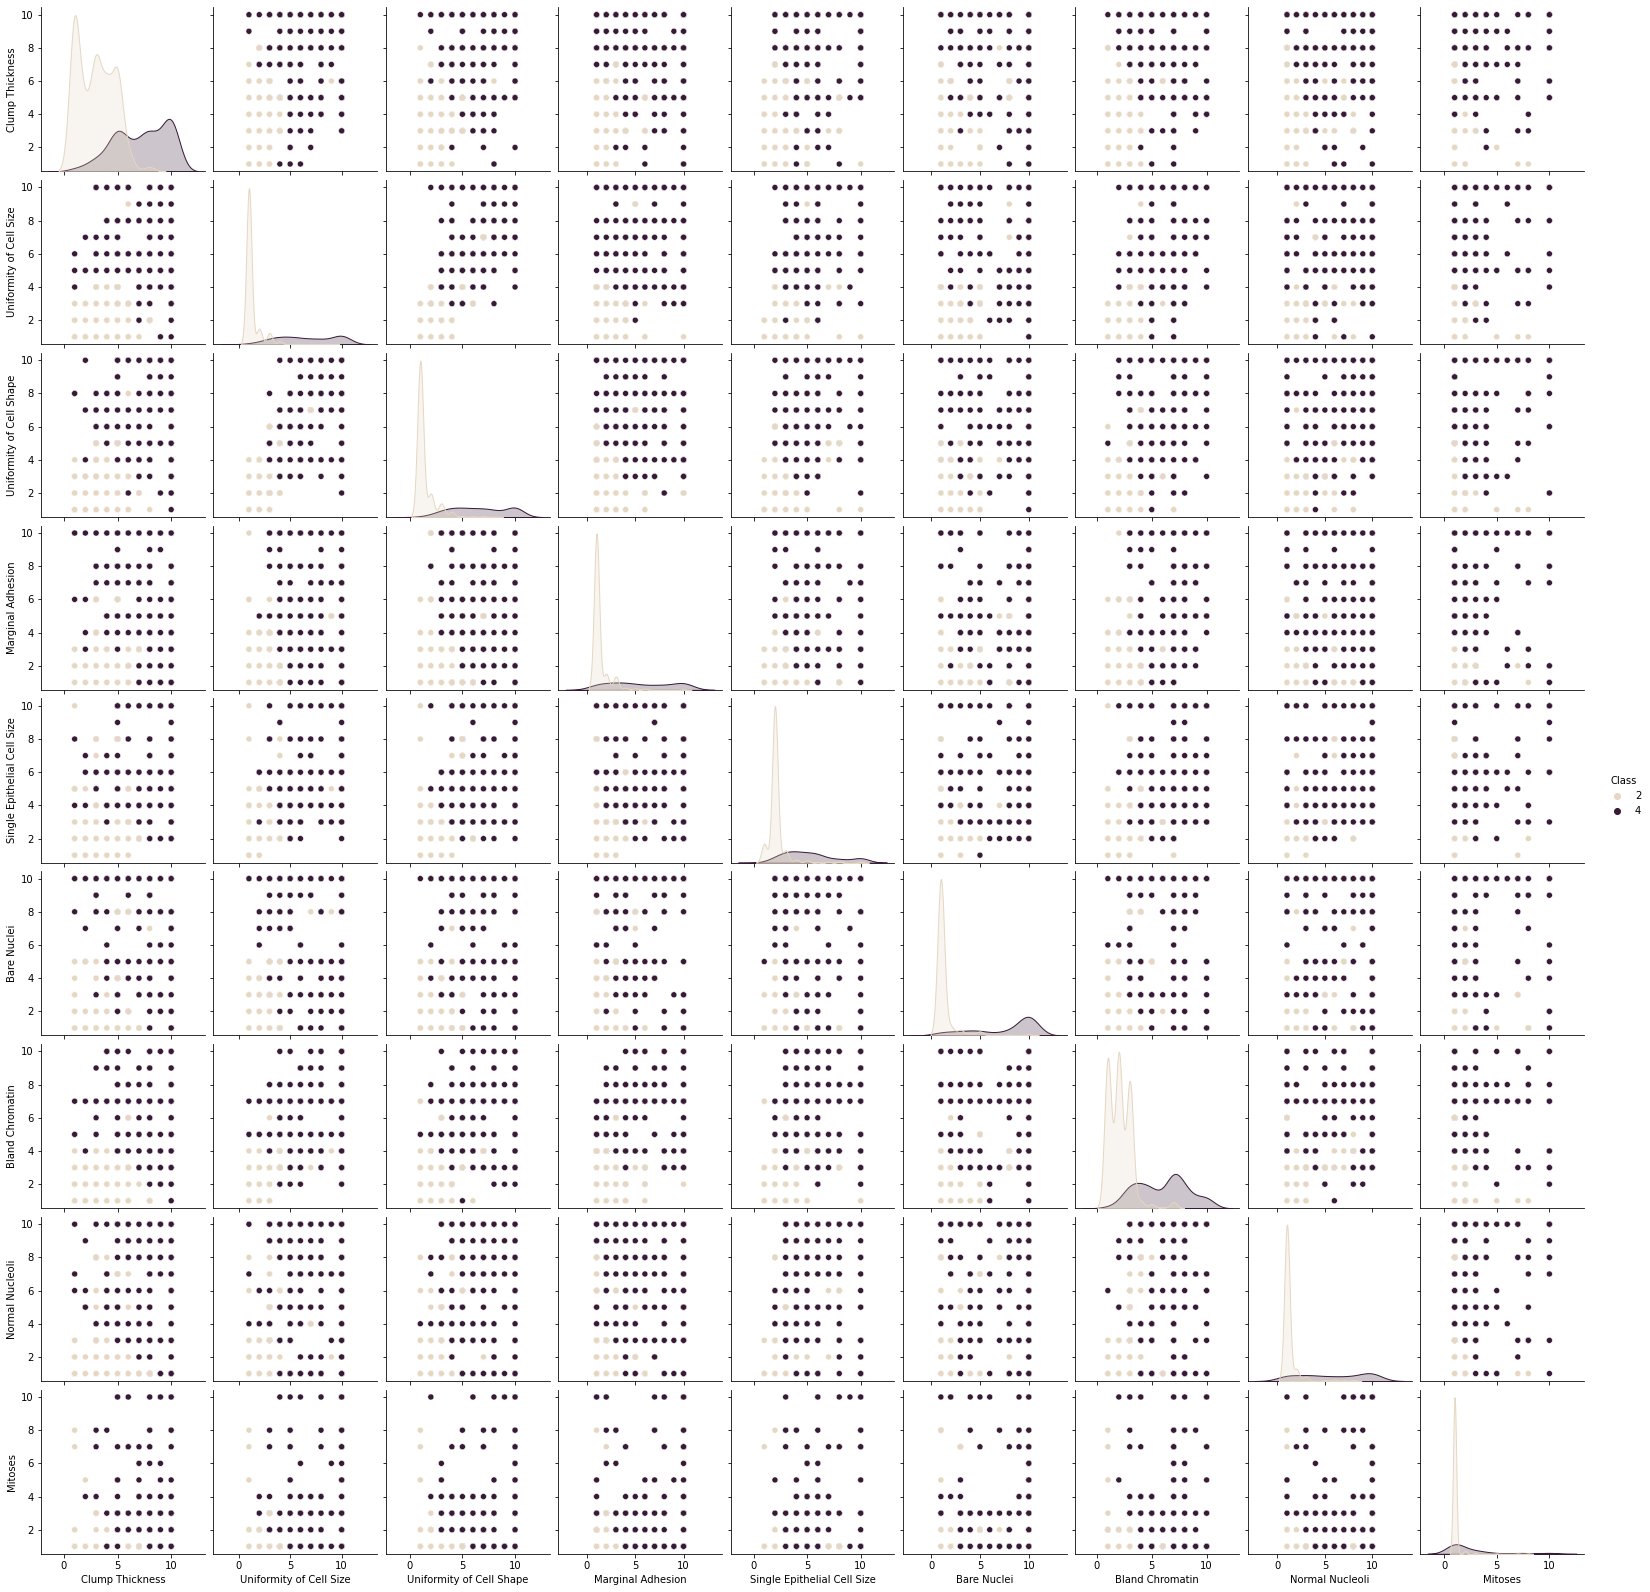

In [11]:
sns.pairplot(df,hue = "Class", palette= "ch:.25")

In [12]:
df["Class"].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [13]:
df["Clump Thickness"].value_counts()

1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: Clump Thickness, dtype: int64

In [14]:
df["Mitoses"].value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

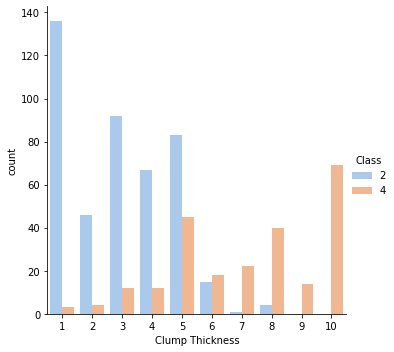

In [15]:
#class 4 cancer has greater than '5' clump thickness generally wheras class 2 cancer has less than '5' clump thickness 
sns.catplot(data = df, x = "Clump Thickness", kind = "count", hue = "Class", palette = "pastel")

In [16]:
#since clump thickness has a great effect in the class lets make sure that it is properly disturbuted in the test set

In [17]:
#checking if its properly disturbuted by comparing test set to overall set
X_test["Clump Thickness"].value_counts()/len(X_test)

1     0.194690
3     0.185841
5     0.176991
10    0.115044
4     0.101770
8     0.075221
2     0.070796
6     0.053097
7     0.017699
9     0.008850
Name: Clump Thickness, dtype: float64

In [18]:
df["Clump Thickness"].value_counts()/len(df)
#since both are pretty similiar we wont do anything to the test set

1     0.203514
5     0.187408
3     0.152269
4     0.115666
10    0.101025
2     0.073206
8     0.064422
6     0.048316
7     0.033675
9     0.020498
Name: Clump Thickness, dtype: float64

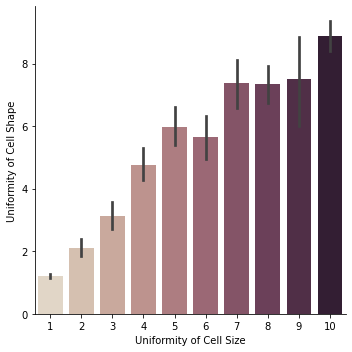

In [19]:
sns.catplot(data=df, x="Uniformity of Cell Size", y="Uniformity of Cell Shape", kind="bar",palette = "ch:.25")
#the cell size and the cell shape are pretty similair and uniform 

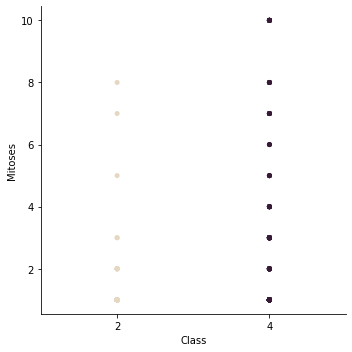

In [20]:
#the number of mtoses doesnt really have that much of an effect on the class
sns.catplot(data=df, x="Class", y="Mitoses", jitter=False, palette = "ch:.25")

In [21]:
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


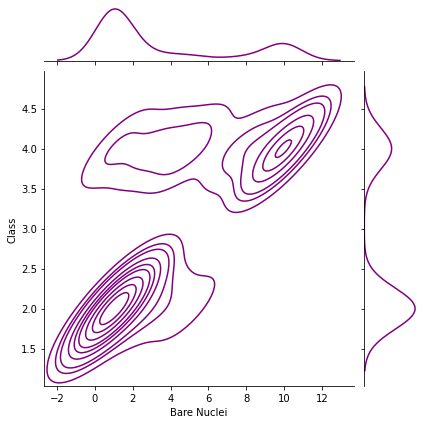

In [22]:
sns.jointplot(x='Bare Nuclei',y='Class',data=df,color='purple',kind = "kde")

## LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()

In [25]:
logmodel.fit(X_train, y_train)

LogisticRegression()

## Predictions and evaluations

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97       142
           4       0.97      0.90      0.94        84

    accuracy                           0.96       226
   macro avg       0.96      0.95      0.95       226
weighted avg       0.96      0.96      0.96       226



In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
print(confusion_matrix(y_test,predictions))

[[140   2]
 [  8  76]]


In [31]:
print(accuracy_score(y_test,predictions))

0.9557522123893806
